In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import the predictor data at predictor
predictor = pd.read_csv('./dataset/actual.csv')
predictor.head()

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


In [3]:
#There are only 72 patients that I can use to train my data, which is not a lot to have great results (can't remove any patients)
predictor.shape

(72, 2)

In [4]:
# Since almost 2/3 of the patients have ALL cancer, this means that anything that's over a 66% accuracy will be an improvement
# This will be important to my results later on.
predictor.cancer.value_counts()

ALL    47
AML    25
Name: cancer, dtype: int64

In [5]:
#import dataset part 1 as data1
data1 = pd.read_csv('./dataset/data_set_ALL_AML_independent.csv')
data1.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [6]:
#import dataset part 2 as data2
data2 = pd.read_csv('./dataset/data_set_ALL_AML_train.csv')
data2.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [7]:
# determine the shape of the seperate datasets to make sure they lined up to be able to combine later. They have the same number of rows, so the data will be able to be combined.
# While, as mentioned earlier, there are very few patients, there is a lot of information availble for each one (7129 columns)
print(data1.shape)
print(data2.shape)

(7129, 70)
(7129, 78)


In [8]:
# used info to see all the column names and determine if there are any missing values, which there are not.
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129 entries, 0 to 7128
Data columns (total 70 columns):
Gene Description         7129 non-null object
Gene Accession Number    7129 non-null object
39                       7129 non-null int64
call                     7129 non-null object
40                       7129 non-null int64
call.1                   7129 non-null object
42                       7129 non-null int64
call.2                   7129 non-null object
47                       7129 non-null int64
call.3                   7129 non-null object
48                       7129 non-null int64
call.4                   7129 non-null object
49                       7129 non-null int64
call.5                   7129 non-null object
41                       7129 non-null int64
call.6                   7129 non-null object
43                       7129 non-null int64
call.7                   7129 non-null object
44                       7129 non-null int64
call.8                   712

In [9]:
# repeated the above step for data2
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129 entries, 0 to 7128
Data columns (total 78 columns):
Gene Description         7129 non-null object
Gene Accession Number    7129 non-null object
1                        7129 non-null int64
call                     7129 non-null object
2                        7129 non-null int64
call.1                   7129 non-null object
3                        7129 non-null int64
call.2                   7129 non-null object
4                        7129 non-null int64
call.3                   7129 non-null object
5                        7129 non-null int64
call.4                   7129 non-null object
6                        7129 non-null int64
call.5                   7129 non-null object
7                        7129 non-null int64
call.6                   7129 non-null object
8                        7129 non-null int64
call.7                   7129 non-null object
9                        7129 non-null int64
call.8                   712

In [10]:
# this step is no necessary due to removing these columns later on, but could still be useful in final analysis
data1.replace(['A','P','M'],[1.0,2.0,3.0],inplace=True)
data2.replace(['A','P','M'],[1.0,2.0,3.0],inplace=True)

In [11]:
#to ensure the values were replaced, reprinted data1.head and now can see the call values have changed to 1 for the first five rows
data1.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,1.0,-87,1.0,22,1.0,-243,1.0,...,-62,1.0,-58,1.0,-161,1.0,-48,1.0,-176,1.0
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,1.0,-248,1.0,-153,1.0,-218,1.0,...,-198,1.0,-217,1.0,-215,1.0,-531,1.0,-284,1.0
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,1.0,262,1.0,17,1.0,-163,1.0,...,-5,1.0,63,1.0,-46,1.0,-124,1.0,-81,1.0
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,1.0,295,1.0,276,1.0,182,1.0,...,141,1.0,95,1.0,146,1.0,431,1.0,9,1.0
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,1.0,-226,1.0,-211,1.0,-289,1.0,...,-256,1.0,-191,1.0,-172,1.0,-496,1.0,-294,1.0


In [12]:
# combined data1 and data2
all_data = pd.merge(data1, data2, on='Gene Description')
all_data.head()

,Gene Description,Gene Accession Number_x,39,call_x,40,call.1_x,42,call.2_x,47,call.3_x,...,29,call.33_y,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,1.0,-87,1.0,22,1.0,-243,1.0,...,15,1.0,-318,1.0,-32,1.0,-124,1.0,-135,1.0
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,1.0,-248,1.0,-153,1.0,-218,1.0,...,-114,1.0,-192,1.0,-49,1.0,-79,1.0,-186,1.0
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,1.0,262,1.0,17,1.0,-163,1.0,...,2,1.0,-95,1.0,49,1.0,-37,1.0,-70,1.0
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,1.0,295,1.0,276,1.0,182,1.0,...,193,1.0,312,1.0,230,2.0,330,1.0,337,1.0
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,1.0,-226,1.0,-211,1.0,-289,1.0,...,-51,1.0,-139,1.0,-367,1.0,-188,1.0,-407,1.0


In [13]:
# At this point, I decided to remove the 'Gene Description', 'Gene Accession Number_x' and call_# columns from the all_data dataframe.
all_data.drop(['Gene Accession Number_x','call_x', 'call.1_x', 'call.2_x','call.3_x','call.4_x','call.5_x','call.6_x','call.7_x','call.8_x','call.9_x','call.10_x','call.11_x','call.12_x','call.13_x','call.14_x','call.15_x','call.16_x','call.17_x','call.18_x','call.19_x','call.20_x','call.21_x','call.22_x', 'call.23_x','call.24_x','call.25_x', 'call.26_x', 'call.27_x', 'call.28_x', 'call.29_x', 'call.30_x', 'call.31_x', 'call.32_x', 'call.33_x','call_y','Gene Accession Number_y', 'call.1_y', 'call.2_y','call.3_y','call.4_y','call.5_y','call.6_y','call.7_y','call.8_y','call.9_y','call.10_y','call.11_y','call.12_y','call.13_y','call.14_y','call.15_y','call.16_y','call.17_y','call.18_y','call.19_y','call.20_y','call.21_y','call.22_y', 'call.23_y','call.24_y','call.25_y', 'call.26_y','call.27_y','call.33_y', 'call.34', 'call.35', 'call.36', 'call.37', 'call.28_y', 'call.29_y','call.30_y', 'call.31_y', 'call.32_y'], axis=1, inplace = True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8363 entries, 0 to 8362
Data columns (total 73 columns):
Gene Description    8363 non-null object
39                  8363 non-null int64
40                  8363 non-null int64
42                  8363 non-null int64
47                  8363 non-null int64
48                  8363 non-null int64
49                  8363 non-null int64
41                  8363 non-null int64
43                  8363 non-null int64
44                  8363 non-null int64
45                  8363 non-null int64
46                  8363 non-null int64
70                  8363 non-null int64
71                  8363 non-null int64
72                  8363 non-null int64
68                  8363 non-null int64
69                  8363 non-null int64
67                  8363 non-null int64
55                  8363 non-null int64
56                  8363 non-null int64
59                  8363 non-null int64
52                  8363 non-null int64
53          

In [14]:
#after removing all of the columns, I checked to make sure I didn't miss any and that I have the numbers 1-72 (representing the patients) left
list(all_data)

['Gene Description',
 '39',
 '40',
 '42',
 '47',
 '48',
 '49',
 '41',
 '43',
 '44',
 '45',
 '46',
 '70',
 '71',
 '72',
 '68',
 '69',
 '67',
 '55',
 '56',
 '59',
 '52',
 '53',
 '51',
 '50',
 '54',
 '57',
 '58',
 '60',
 '61',
 '65',
 '66',
 '63',
 '64',
 '62',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '34',
 '35',
 '36',
 '37',
 '38',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33']

In [15]:
all_data.set_index('Gene Description', inplace = True)
all_data.head()

,39,40,42,47,48,49,41,43,44,45,...,35,36,37,38,28,29,30,31,32,33
Gene Description,,,,,,,,,,,,,,,,,,,,,
AFFX-BioB-5_at (endogenous control),-342,-87,22,-243,-130,-256,-62,86,-146,-187,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
AFFX-BioB-M_at (endogenous control),-200,-248,-153,-218,-177,-249,-23,-36,-74,-187,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
AFFX-BioB-3_at (endogenous control),41,262,17,-163,-28,-410,-7,-141,170,312,...,-57,136,124,-1,-125,2,-95,49,-37,-70
AFFX-BioC-5_at (endogenous control),328,295,276,182,266,24,142,252,174,142,...,132,318,325,392,241,193,312,230,330,337
AFFX-BioC-3_at (endogenous control),-224,-226,-211,-289,-170,-535,-233,-201,-32,114,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [16]:
data3 = all_data.transpose()

In [17]:

data3['patient']= data3.index
data3.head(20)

Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,PLGL Plasminogen-like protein,ID1 Inhibitor of DNA binding 1; dominant negative helix-loop-helix protein,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein kinase II delta E mRNA; partial cds,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypeptide 1,GB DEF = Glycophorin Sta (type A) exons 3 and 4; partial,GB DEF = mRNA (clone 1A7),patient
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,533,-101,277,1023,67,214,-135,168,-70,39
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,80,-518,83,529,-295,352,-67,-33,-21,40
42,22,-153,17,276,-211,-250,55,-141,0,500,...,243,-189,413,399,16,558,24,1971,-42,42
47,-243,-218,-163,182,-289,-268,-285,-172,52,-134,...,168,-180,174,277,6,81,2,510,-73,47
48,-130,-177,-28,266,-170,-326,-222,-93,10,159,...,413,-146,233,643,51,450,-46,333,-19,48
49,-256,-249,-410,24,-535,-810,709,-316,27,14,...,833,-216,76,1455,-123,491,-55,170,-64,49
41,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,300,-148,129,383,46,104,15,100,-18,41
43,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,163,-341,341,91,-84,615,-52,1545,-81,43
44,-146,-74,170,174,-32,-318,8,-152,-148,17,...,186,-71,180,690,-142,249,-220,45,-108,44
45,-187,-187,312,142,114,-148,-184,-133,12,97,...,167,-133,37,125,-185,13,-148,112,-190,45


In [18]:
#I had to convert the new patient column in data3 to be an int, then merged it with the predictor dataframe to my final_data
data3['patient']=data3['patient'].apply(int)
final_data = pd.merge(data3, predictor, on= 'patient')
final_data.head()

,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,ID1 Inhibitor of DNA binding 1; dominant negative helix-loop-helix protein,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein kinase II delta E mRNA; partial cds,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypeptide 1,GB DEF = Glycophorin Sta (type A) exons 3 and 4; partial,GB DEF = mRNA (clone 1A7),patient,cancer
0,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,-101,277,1023,67,214,-135,168,-70,39,ALL
1,-87,-248,262,295,-226,-493,367,-452,194,162,...,-518,83,529,-295,352,-67,-33,-21,40,ALL
2,22,-153,17,276,-211,-250,55,-141,0,500,...,-189,413,399,16,558,24,1971,-42,42,ALL
3,-243,-218,-163,182,-289,-268,-285,-172,52,-134,...,-180,174,277,6,81,2,510,-73,47,ALL
4,-130,-177,-28,266,-170,-326,-222,-93,10,159,...,-146,233,643,51,450,-46,333,-19,48,ALL


In [19]:
# the cancer (predictor) column needed to be integers, not strings
final_data.replace(['ALL','AML'],[0,1],inplace=True)
final_data.head()
final_data.tail()

,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,ID1 Inhibitor of DNA binding 1; dominant negative helix-loop-helix protein,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein kinase II delta E mRNA; partial cds,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypeptide 1,GB DEF = Glycophorin Sta (type A) exons 3 and 4; partial,GB DEF = mRNA (clone 1A7),patient,cancer
67,15,-114,2,193,-51,-155,29,-105,42,524,...,-78,173,492,54,277,-13,2484,-2,29,1
68,-318,-192,-95,312,-139,-344,324,-237,105,167,...,-394,225,737,63,472,33,371,-31,30,1
69,-32,-49,49,230,-367,-508,-349,-194,34,-56,...,-442,36,592,57,215,-22,133,-32,31,1
70,-124,-79,-37,330,-188,-423,-31,-223,-82,176,...,-396,348,938,-15,433,-2,298,-3,32,1
71,-135,-186,-70,337,-407,-566,-141,-315,206,321,...,-193,209,634,-58,375,-23,790,-10,33,1


In [20]:
# Now my data is ready to be analyzed.A heatmap won't be of much use here because there are just too many features, so it will be too difficult to tell. 
# this information will help to decide what features to use for to linear regression and train/test split.
corr = final_data.corr()
corr.sort_values(by = ['cancer'])

,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,ID1 Inhibitor of DNA binding 1; dominant negative helix-loop-helix protein,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein kinase II delta E mRNA; partial cds,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypeptide 1,GB DEF = Glycophorin Sta (type A) exons 3 and 4; partial,GB DEF = mRNA (clone 1A7),patient,cancer
Transcriptional activator hSNF2b,-0.178028,-0.021946,-0.148294,-0.094799,0.066998,-0.017365,0.094324,0.111668,-0.069180,0.073981,...,0.197340,0.196152,0.312979,0.101658,0.275758,-0.107443,-0.208714,0.085589,-0.261902,-0.637117
TCF3 Transcription factor 3 (E2A immunoglobulin enhancer binding factors E12/E47),-0.090621,0.149666,-0.050817,-0.108450,0.003976,-0.034239,0.161046,0.134954,-0.133044,0.169717,...,0.175081,0.281333,0.121849,0.031351,0.117434,-0.030984,-0.063568,-0.039215,-0.227568,-0.631568
PROTEASOME IOTA CHAIN,0.048150,0.172637,-0.017046,-0.060119,0.192576,0.116247,0.219634,0.267978,-0.230527,0.034318,...,0.269656,0.192316,0.171121,0.026902,0.121914,0.021590,-0.269080,-0.053426,-0.334648,-0.625556
MYL1 Myosin light chain (alkali),0.115230,0.158566,0.012580,-0.076848,0.266091,0.232565,0.172979,0.345848,-0.310166,0.102837,...,0.347814,0.152694,0.081063,0.037359,0.095288,0.010404,-0.268899,-0.023586,-0.367155,-0.617826
CCND3 Cyclin D3,0.041156,0.193505,0.058566,-0.212001,0.244186,0.193203,0.157273,0.345277,-0.309604,0.070883,...,0.264245,0.230787,0.076676,0.103485,0.085131,-0.070802,-0.217347,-0.074955,-0.218041,-0.617569
TCF3 Transcription factor 3 (E2A immunoglobulin enhancer binding factors E12/E47),0.001833,0.039351,-0.014212,-0.128849,0.119503,0.154434,0.115476,0.246679,-0.274518,0.131661,...,0.217246,0.257064,0.018337,-0.051586,0.211566,-0.055422,-0.166086,-0.031443,-0.128523,-0.610968
MB-1 gene,-0.204978,0.018300,-0.035547,-0.232768,0.051897,0.013599,0.069461,0.122664,-0.115722,-0.046778,...,0.178889,0.098399,0.029783,-0.088086,0.225771,-0.292440,-0.202988,-0.181499,-0.076238,-0.595825
CD19 gene,0.076557,0.042328,0.076547,-0.184927,0.092931,0.022948,0.223083,0.088002,-0.024422,-0.136181,...,0.072457,0.013255,0.012767,-0.202871,0.321397,-0.148855,-0.199632,0.037101,-0.103364,-0.592210
SPTAN1 Spectrin; alpha; non-erythrocytic 1 (alpha-fodrin),0.085054,0.168121,0.033927,-0.015641,0.153290,0.018187,0.250327,0.111679,-0.146358,0.174398,...,0.207069,0.261721,0.259356,-0.080059,0.114687,-0.014223,-0.257457,0.022195,-0.316610,-0.585880
Macmarcks,-0.048727,0.042406,-0.046712,0.002222,0.012931,0.010713,0.207525,0.155867,-0.155253,0.190586,...,0.194415,0.361524,0.221669,-0.008790,-0.001308,0.014924,-0.214329,-0.004270,-0.238240,-0.578840


C:\Users\t89fo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


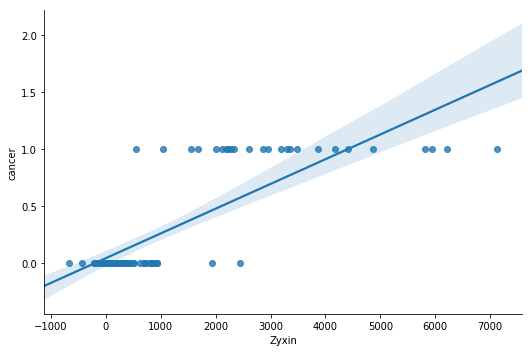

In [22]:
# the above correlation data helped to determine that 'Transcriptional activator hSNF2b', 'TCF3 Transcription factor 3 (E2A immunoglobulin enhancer binding factors E12/E47)', 'PROTEASOME IOTA CHAIN' are the three with negative correlation to cancer and 'Zyxin', 'PRG1 Proteoglycan 1; secretory granule', and 'CD33 CD33 antigen (differentiation antigen)' are the most positively correlated.
#starting with Zyxin, we can visually see that a Zyxin value of less than 1000 is likley ALL and higher values are likely AML. A very similar relationship is seen for all three with a high positive correlation.
import seaborn as sns
sns.lmplot(x='Zyxin', y="cancer", data=final_data, aspect=1.5);

C:\Users\t89fo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


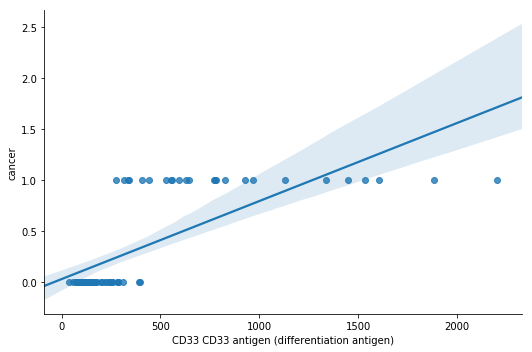

In [23]:
#
sns.lmplot(x='CD33 CD33 antigen (differentiation antigen)', y="cancer", data=final_data, aspect=1.5);

C:\Users\t89fo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


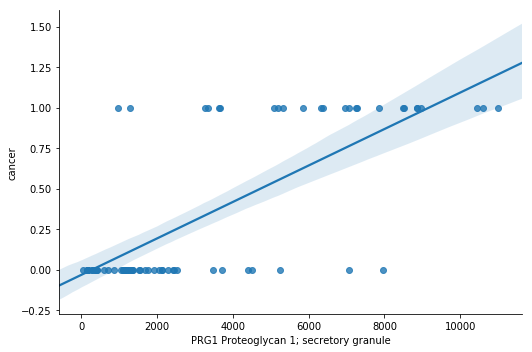

In [24]:
sns.lmplot(x='PRG1 Proteoglycan 1; secretory granule', y="cancer", data=final_data, aspect=1.5);

C:\Users\t89fo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


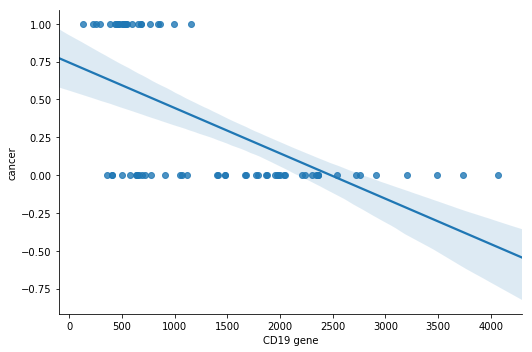

In [30]:
# I was unable to plot 'Transcriptional activator hSNF2b', 'TCF3 Transcription factor 3 (E2A immunoglobulin enhancer binding factors E12/E47)', 'PROTEASOME IOTA CHAIN' vs cancer and have not been able to fiture out why, so I chose three new negative correlations and was able to graph them as seen below.
#CD19 gene does not visually look as well correlated as the previous graphs, however, the majority of AML cancer patients have a value from 0 to 1000, which should help with identifity patients combined with the other features
sns.lmplot(x='CD19 gene', y="cancer", data=final_data, aspect=1.5);

C:\Users\t89fo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


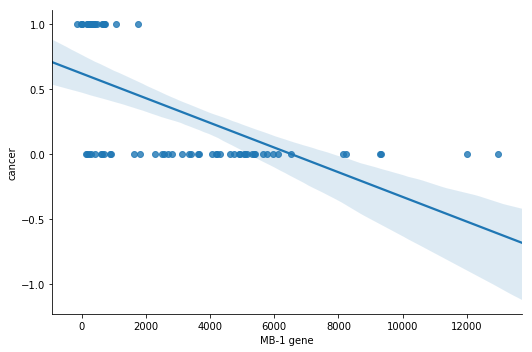

In [29]:
# same as with the CD19 gene
sns.lmplot(x='MB-1 gene', y="cancer", data=final_data, aspect=1.5);

C:\Users\t89fo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


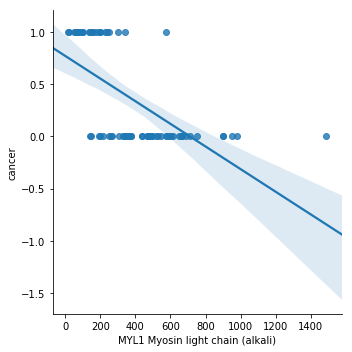

In [33]:
sns.lmplot(x='MYL1 Myosin light chain (alkali)', y="cancer", data=final_data);

In [ ]:
#based on the results above, these six features could give a good prediction for cancer type using Train/test or KNN. Since there are not a lot of patients as data, K-fold correlation also makes sense.